In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

In [33]:
df = pd.read_csv('../data/cleaned_data.csv')

In [34]:
df

,id,age,experience,income,postal_code,family_size,creditc_avg_spent,education,mortgage,investment_account,deposit_account,internet_banking,personal_loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO
4,6,37,13,29.0,92121,4.0,0.4,Graduate,155,0,0,YES,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4996,29,3,40.0,92697,1.0,1.9,Advanced Degree,0,0,0,YES,NO
4967,4997,30,4,15.0,92037,4.0,0.4,Undergrad,85,0,0,YES,NO
4968,4998,63,39,24.0,93023,2.0,0.3,Advanced Degree,0,0,0,NO,NO
4969,4999,65,40,49.0,90034,3.0,0.5,Graduate,0,0,0,YES,NO


In [35]:
df.columns

Index(['id', 'age', 'experience', 'income', 'postal_code', 'family_size',
       'creditc_avg_spent', 'education', 'mortgage', 'investment_account',
       'deposit_account', 'internet_banking', 'personal_loan'],
      dtype='object')

In [36]:
le = LabelEncoder()

In [37]:
feat_df = df.copy()
feat_df['personal_loan'] = le.fit_transform(df['personal_loan'])
feat_df['internet_banking'] = le.fit_transform(df['internet_banking'])

### Feature Selection

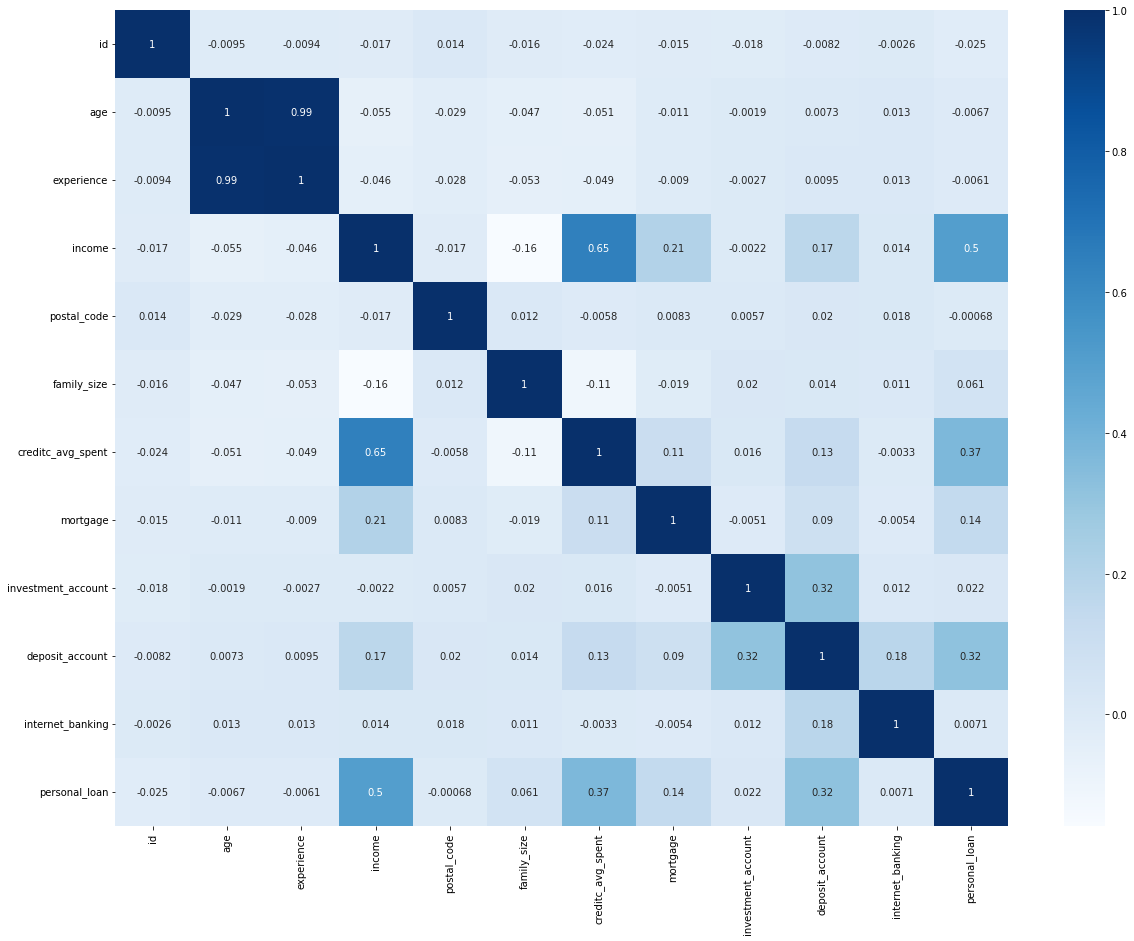

In [38]:
corr = feat_df.corr()
sns.heatmap(corr, cmap='Blues', annot=True)
plt.gcf().set_size_inches(20, 15)
plt.show()


## Age, experience, internet_banking and postal_code have little to no impact on the decision for personal_loan, so we ll drop them

In [39]:
cols_to_encode = ['education', 'investment_account']
cols_to_scale = ['income', 'family_size','creditc_avg_spent', 'mortgage']

In [40]:
cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                           ('scalar', OrdinalEncoder())])
num_transformer = Pipeline([('imputer', SimpleImputer(strategy='mean', missing_values=np.nan)),
                           ('ordinal', StandardScaler())])

In [41]:
preprocess = ColumnTransformer(
transformers=[
    ('num', num_transformer, cols_to_scale),
    ('cat', cat_transformer, cols_to_encode)
])

In [42]:
y = df['personal_loan']
X = df.drop(columns=['personal_loan', 'postal_code'])

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [19]:
knn_model = Pipeline(steps=[('preprocess', preprocess),
                          ('model', KNeighborsClassifier())])
knn_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('ordinal',
                                                                   StandardScaler())]),
                                                  ['income', 'family_size',
                                                   'creditc_avg_spent',
                                                   'mortgage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                 

In [20]:
# knn_model.score(X_test, y_test)


In [21]:
# knn_model_scores = cross_val_score(knn_model, X, y, cv=10, scoring='roc_auc')
# knn_model_scores

In [22]:
# from sklearn.metrics import roc_auc_score, roc_curve
# import matplotlib.pyplot as plt

# # Load the predicted probabilities and true labels
# y_pred = knn_model.predict(X_test)


# # Compute the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred)

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Plot the ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) curve')
# plt.legend(loc='lower right')
# plt.show()

In [23]:
rf_model = Pipeline(steps=[('preprocess', preprocess),
                          ('model', RandomForestClassifier())])
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('ordinal',
                                                                   StandardScaler())]),
                                                  ['income', 'family_size',
                                                   'creditc_avg_spent',
                                                   'mortgage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scalar',
                                                 

In [24]:
# rf_model.score(X_test, y_test)


In [25]:
# rf_model_scores = cross_val_score(rf_model, X, y, cv=10, scoring='roc_auc')
# rf_model_scores

In [26]:


# # Load the predicted probabilities and true labels
# y_pred = rf_model.predict(X_test)


# # Compute the ROC AUC score
# roc_auc = roc_auc_score(y_test, y_pred)

# # Compute the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# # Plot the ROC curve
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) curve')
# plt.legend(loc='lower right')
# plt.show()

In [27]:
def model_performance(model, X, y, X_test, y_test):
    print(f'Model Score with CV is {model.score(X_test, y_test)}')
    print("============================================\n============================================")
    scores_cv = cross_val_score(rf_model, X, y, cv=10, scoring='roc_auc')
    print(f'Model Scores with CV based on ROC AUC Scoring is {scores_cv}')
    print("============================================\n============================================")

    # Load the predicted probabilities and true labels
    y_pred = model.predict(X_test)


    # Compute the ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred)

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend(loc='lower right')
    plt.show()

Model Score with CV is 0.9698492462311558
Model Scores with CV based on ROC AUC Scoring is [0.99706019 0.9987234  0.99482647 0.99798163 0.99870082 0.99563846
 0.99895601 0.9996752  0.99846882 0.99828322]


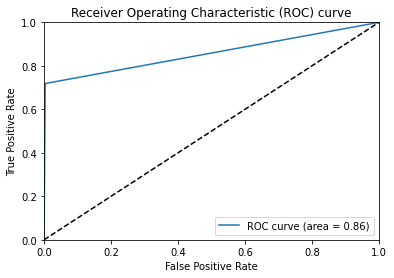

In [28]:
model_performance(knn_model, X, y, X_test, y_test)

Model Score with CV is 0.9889447236180905
Model Scores with CV based on ROC AUC Scoring is [0.99696759 0.99862884 0.99554566 0.99805122 0.99890961 0.99591685
 0.99911841 0.9996984  0.99821362 0.99853842]


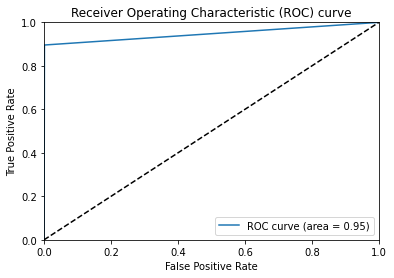

In [29]:
model_performance(rf_model, X, y, X_test, y_test)

In [30]:
joblib.dump(rf_model,'../model/model.pkl')

['../model/model.pkl']